# Play game

In [1]:
# Load essential libraries
import pandas as pd
import numpy as np

In [2]:
# Define Monty Hall class
class MontyHall():
    # Game attributes
    def __init__(self, n_doors = 3, p = [1/3, 1/3, 1/3]):
        self.n_doors     = n_doors
        self.p_array     = p
        self.win_door    = np.random.choice([1,2,3], p = self.p_array)
        self.player_door = np.random.choice([1,2,3], p = self.p_array)

    # Game Methods    
    def reveal_door(self):
        remaining_options   = [n for n in [1,2,3] if n not in [self.win_door, self.player_door]]    
        self.revealed_door  = np.random.choice(remaining_options)                
    def switch_door(self):
        options          = [n for n in [1,2,3] if n not in [self.revealed_door, self.player_door]]
        self.player_door = options[0]
    def evaluate_result(self):
        if self.player_door == self.win_door:
            return 1
        else:
            return 0
    def get_revealed_door(self):
        return self.revealed_door
    def get_player_door(self):
        return self.player_door
    def __str__(self):
        return 'Winning Door: {}'.format(self.win_door) + " | " + 'Player Pick: {}'.format(self.player_door)

# Define function to run game
def play_monty_hall_game(shouldSwitch: bool = True, shouldPrint: bool = False):
    # Start the game, prize door is randomly chosen and player picks door randomly
    game = MontyHall()
    if shouldPrint:
        print('Stage\t\t', 'Outcome')
        print('-'*8, '\t', '-'*50)
        print('[START]\t\t', game)

    # Host reveals door!
    game.reveal_door()
    if shouldPrint:
        revealed = game.get_revealed_door()
        print('[REVEAL]\t Door {} was revealed!'.format(revealed))

    # Does player switch?
    if shouldSwitch:
        game.switch_door()
    if shouldPrint:
        player_door = game.get_player_door()
        if shouldSwitch:
            print('[SWITCH]\t Player Switches to Door {}'.format(player_door))
        else:
            pass

    # Did the player win?
    result = game.evaluate_result()
    if shouldPrint:
        print('[END]\t\t', game)
        if result:
            print('[RESULT]\t Player Wins!')
        else:
            print('[RESULT]\t Player lost :(')

    if shouldPrint:
        pass
    else:
        return result

In [8]:
# Define strategy
shouldSwitch = False

In [9]:
# Run 1 game!
play_monty_hall_game(shouldSwitch, shouldPrint = True)

Stage		 Outcome
-------- 	 --------------------------------------------------
[START]		 Winning Door: 3 | Player Pick: 1
[REVEAL]	 Door 2 was revealed!
[END]		 Winning Door: 3 | Player Pick: 1
[RESULT]	 Player lost :(


# Simulate!

In [10]:
# Let's play the game X times!
n_iterations       = 10**3
monty_hall_results = [play_monty_hall_game(shouldSwitch) for _ in range(n_iterations)]

In [11]:
# Store results into a table!
p_win = (
            pd
            .Series(monty_hall_results)  
            .expanding()
            .mean()
            .to_frame(name = 'prob_win')
            .assign(lower_bound = lambda x: np.maximum(x.prob_win - (1.96/(2*np.sqrt(x.index+1))), 0))
            .assign(upper_bound = lambda x: np.minimum(x.prob_win + (1.96/(2*np.sqrt(x.index+1))), 1))
            .assign(experiment_no = lambda x: x.index+1)
            .assign(shouldSwitch = shouldSwitch)
        )
display(p_win.tail())

,prob_win,lower_bound,upper_bound,experiment_no,shouldSwitch
995,0.348394,0.317341,0.379446,996,False
996,0.349047,0.318010,0.380084,997,False
997,0.349699,0.318678,0.380721,998,False
998,0.350350,0.319345,0.381356,999,False
999,0.351000,0.320010,0.381990,1000,False


# Make a fancy plot!

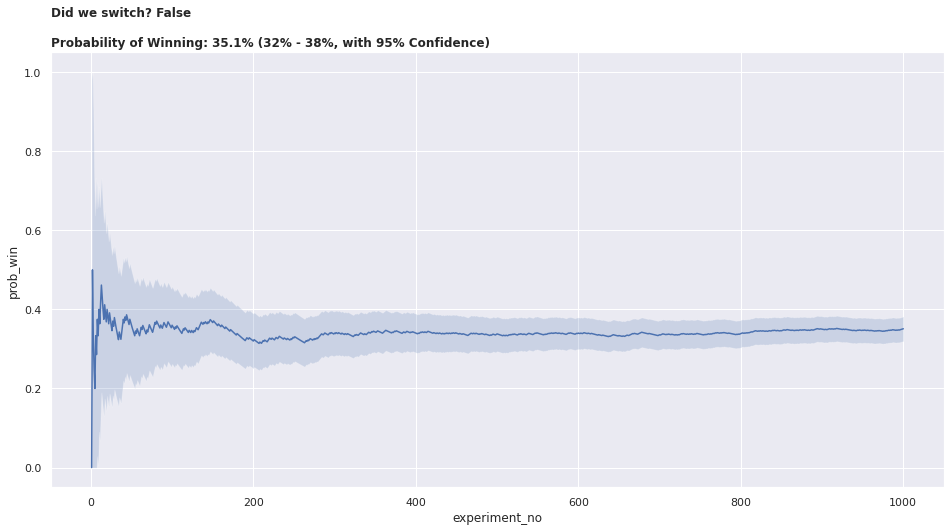

In [12]:
# Fancy a fancy plot?
import matplotlib.pyplot as plt 
import seaborn as sns

## Plot data
plt.figure(figsize = (16,8))
sns.lineplot(data = p_win, x = 'experiment_no', y = 'prob_win', markers = True)
plt.fill_between(p_win.experiment_no, p_win.lower_bound, p_win.upper_bound, alpha = .2)

## Headline title
p_hat, p_lower, p_upper, n_iteration, strategy = p_win.tail(1).values[0]
plot_title                           = f"""Did we switch? {strategy} \n\nProbability of Winning: {p_hat:.1%} ({p_lower:.0%} - {p_upper:.0%}, with 95% Confidence)"""
plt.title(plot_title, loc = 'left', fontweight = 'bold')

sns.set_theme()
plt.show()